### Credit Scoring SME's Analysis

#### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

#### Load data yang bersumber dari SIKEPANG

In [2]:
df = pd.read_excel('Profil UMKM_ML.xlsx')
print(df.shape)
df.head()

(342, 22)


,Periode,No. ID Ref,Nama Klaster/ Usaha/ Kelompok Usaha,Nama Ketua Kelompok/ Pengusaha,Jenis Usaha,Bentuk Badan Usaha,Badan Pengawas Obat dan Makanan (BPOM),Sertifikasi Halal MUI,HACCP,Standar Nasional Indonesia (SNI),...,Jumlah Tenaga Kerja(Orang),Sektor Ekonomi,Total Produksi Dihasilkan,Total Biaya Produksi (Rp),Total Pendapatan (Rp),Total Laba/Rugi (Rp),Total Aset Dimiliki (Rp),Memiliki Simpanan di Bank,Pinjaman Bank,Outstanding Pinjaman
0,2023-03-01,1067,Kerajinan Anyaman Purun dan Ilung,SOPIANOR,NON PERTANIAN,NaN,TIDAK,TIDAK,TIDAK,TIDAK,...,70,Sektor Industri Pengolahan (Manufaktur) : Anek...,6180.0,60564000,182000000.0,121436000.0,1.100000e+09,YA,1,62110000.0
1,2023-03-01,11,KLASTER PADI UNGGUL ORGANIK,Randam Purnomo,PERTANIAN,NaN,TIDAK,TIDAK,TIDAK,TIDAK,...,97,"Sektor Pertanian, Peternakan dan Perikanan",120428.0,215000000,756000000.0,541000000.0,2.250000e+09,YA,0,NaN
2,2023-03-01,11,KLASTER PADI UNGGUL ORGANIK,Randam Purnomo,PERTANIAN,NaN,TIDAK,TIDAK,TIDAK,TIDAK,...,85,"Sektor Pertanian, Peternakan dan Perikanan",28.0,50000000,241000000.0,191000000.0,1.250000e+09,YA,0,NaN
3,2023-03-01,1366,Klaster Udang Kotabaru,BEDDU,NON PERTANIAN,NaN,TIDAK,TIDAK,TIDAK,TIDAK,...,27,"Sektor Pertanian, Peternakan dan Perikanan",6000.0,115000000,600000000.0,485000000.0,8.000000e+08,YA,0,NaN
4,2023-03-01,1821,Rumah Kreasi Tomat,Dhianita Pratiwi,NON PERTANIAN,Perseorangan,TIDAK,YA,TIDAK,TIDAK,...,2,Sektor Industri Pengolahan (Manufaktur) : Indu...,3000.0,21000000,54000000.0,33000000.0,5.750000e+08,YA,0,NaN


In [3]:
# Create binary indicators
binary_map = {'YA': 1, 'TIDAK': 0}
df['Badan Pengawas Obat dan Makanan (BPOM)'] = df['Badan Pengawas Obat dan Makanan (BPOM)'].map(binary_map)
df['Sertifikasi Halal MUI'] = df['Sertifikasi Halal MUI'].map(binary_map)
df['Memiliki Simpanan di Bank'] = df['Memiliki Simpanan di Bank'].map(binary_map)

# Handle missing values in correct order
df['Outstanding Pinjaman'] = df['Outstanding Pinjaman'].fillna(0)
df = df.dropna(subset=['Total Aset Dimiliki (Rp)'])  # drop that 1 NA row

In [4]:
# Drop any remaining rows with NA in modeling columns (just in case)
model_columns = [
    'Badan Pengawas Obat dan Makanan (BPOM)',
    'Jumlah Tenaga Kerja(Orang)',
    'Total Produksi Dihasilkan',
    'Total Biaya Produksi (Rp)',
    'Total Pendapatan (Rp)',
    'Total Laba/Rugi (Rp)',
    'Total Aset Dimiliki (Rp)',
    'Memiliki Simpanan di Bank',
    'Outstanding Pinjaman',
    'Pinjaman Bank'
]
df = df.dropna(subset=model_columns)

# Define X and y
x = df[model_columns[:-1]]
y = df['Pinjaman Bank']

# Fit Logistic model
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x, y)

# Predict the test set
y_pred_log_class = logisticRegr.predict(x)

# Initialize accuracy tracking dictionary
accuracies = {} 

accuracies['Logit 1'] = accuracy_score(y, y_pred_log_class)

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')

Logit 1 accuracy: 97.66%


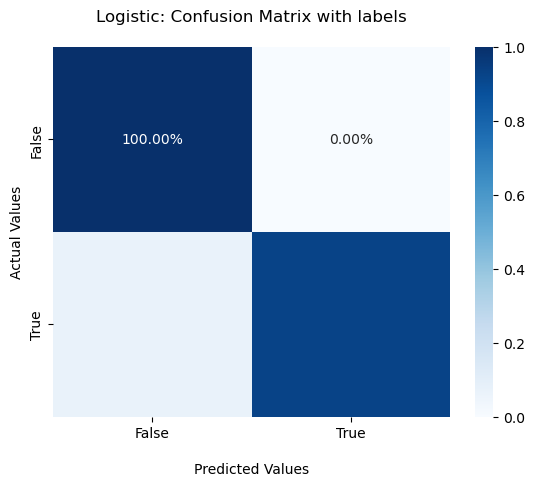

In [5]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y,
        y_pred_log_class,
        normalize = 'true'
    ),
    annot=True,
    fmt='.2%',
    cmap='Blues'
)

ax.set_title('Logistic: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [6]:
# computing model accuracy
print('Model accuracy for logistic model 1 is', round((accuracy_score(y, y_pred_log_class)) * 100, 2), '%')

# computing the validation error
print('Validation error for logistic model 1 is', round((1 - accuracy_score(y, y_pred_log_class)) * 100, 2), '%')

Model accuracy for logistic model 1 is 97.66 %
Validation error for logistic model 1 is 2.34 %


**Note:** If we also want to use other method or algorithm, we can create another estimate.

### Random Forest

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features and target
X = df[model_columns[:-1]]
y = df['Pinjaman Bank']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

KeyError: 'Nama UMKM'

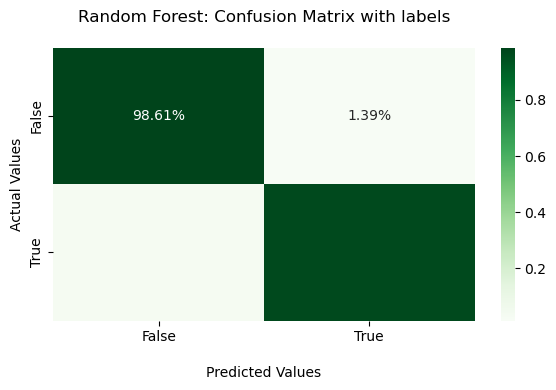

In [8]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    confusion_matrix(y_test, y_pred_rf, normalize='true'),
    annot=True,
    fmt='.2%',
    cmap='Greens'
)
ax.set_title('Random Forest: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.tight_layout()
plt.show()

In [9]:
# computing model accuracy
print('Model accuracy for Random Forest is', round((accuracy_score(y_test, y_pred_rf)) * 100, 2), '%')

# Validation error
validation_error = round((1 - accuracy_score(y_test, y_pred_rf)) * 100, 2)
print('Validation error for Random Forest model is', validation_error, '%')

Model accuracy for Random Forest is 98.06 %
Validation error for Random Forest model is 1.94 %


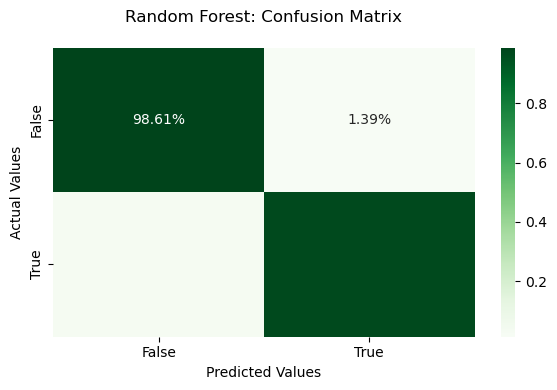

Model accuracy for Random Forest: 98.06%

Tabel Hasil Prediksi Kelayakan UMKM:
                           Nama UMKM Prediksi Kelayakan
0                     Anak Raja Sawa     Layak Dibiayai
1             Gapoktan Kayuh Baimbai        Tidak Layak
2                       Galyna Heiwa        Tidak Layak
3  Kerajinan Anyaman Purun dan Ilung     Layak Dibiayai
4                         MEKAR TANI        Tidak Layak
5                       Galyna Heiwa        Tidak Layak
6                           Go Purun        Tidak Layak
7                               BMBN     Layak Dibiayai
8                    Danish Kitchen         Tidak Layak
9                 Rumah Kreasi Tomat        Tidak Layak


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Data
df = pd.read_excel('Profil UMKM_ML.xlsx')

# Binary mapping
binary_map = {'YA': 1, 'TIDAK': 0}
df['Badan Pengawas Obat dan Makanan (BPOM)'] = df['Badan Pengawas Obat dan Makanan (BPOM)'].map(binary_map)
df['Sertifikasi Halal MUI'] = df['Sertifikasi Halal MUI'].map(binary_map)
df['Memiliki Simpanan di Bank'] = df['Memiliki Simpanan di Bank'].map(binary_map)

# Handle missing values
df['Outstanding Pinjaman'] = df['Outstanding Pinjaman'].fillna(0)
df = df.dropna(subset=['Total Aset Dimiliki (Rp)'])

# Definisikan fitur dan target
model_columns = [
    'Badan Pengawas Obat dan Makanan (BPOM)',
    'Jumlah Tenaga Kerja(Orang)',
    'Total Produksi Dihasilkan',
    'Total Biaya Produksi (Rp)',
    'Total Pendapatan (Rp)',
    'Total Laba/Rugi (Rp)',
    'Total Aset Dimiliki (Rp)',
    'Memiliki Simpanan di Bank',
    'Outstanding Pinjaman',
    'Pinjaman Bank'
]

df = df.dropna(subset=model_columns)

# Define X and y
X = df[model_columns[:-1]]
y = df['Pinjaman Bank']
nama_umkm = df['Nama Klaster/ Usaha/ Kelompok Usaha']

# Split data
X_train, X_test, y_train, y_test, name_train, name_test = train_test_split(
    X, y, nama_umkm, test_size=0.3, random_state=42
)

# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    confusion_matrix(y_test, y_pred_rf, normalize='true'),
    annot=True,
    fmt='.2%',
    cmap='Greens'
)
ax.set_title('Random Forest: Confusion Matrix\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.tight_layout()
plt.show()

accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print(f'Model accuracy for Random Forest: {accuracy_rf}%')

# Tabel hasil prediksi kelayakan
result_df = pd.DataFrame({
    'Nama UMKM': name_test.values,
    'Prediksi Kelayakan': np.where(y_pred_rf == 1, 'Layak Dibiayai', 'Tidak Layak')
})

print("\nTabel Hasil Prediksi Kelayakan UMKM:")
print(result_df.head(10))

# Simpan output ke format excel
result_df.to_excel('Hasil_Prediksi_Kelayakan_UMKM.xlsx', index=False)

# We can create more robust Model! Only if we have enough time :)

In [13]:
# Append predictions to the test set
X_test_with_preds = X_test.copy()
X_test_with_preds['Actual Pinjaman Bank'] = y_test.values
X_test_with_preds['Predicted Pinjaman Bank'] = y_pred_rf

# Merge with original identifiers (like Nama Klaster or Ketua)
df_identifiers = df[['Nama Klaster/ Usaha/ Kelompok Usaha', 'Nama Ketua Kelompok/ Pengusaha']]
df_identifiers = df_identifiers.loc[X_test_with_preds.index]

# Combine identifiers and predictions
results_df = pd.concat([df_identifiers.reset_index(drop=True), X_test_with_preds.reset_index(drop=True)], axis=1)

# Filter only UMKMs predicted as worthy of loan (i.e., Predicted = 1)
umkm_worthy = results_df[results_df['Predicted Pinjaman Bank'] == 1]

# Show the top 10 as a sample
print("Sample of UMKMs predicted to be worthy of receiving a loan:")
print(umkm_worthy[['Nama Klaster/ Usaha/ Kelompok Usaha', 'Nama Ketua Kelompok/ Pengusaha', 'Predicted Pinjaman Bank']].head(10))

Sample of UMKMs predicted to be worthy of receiving a loan:
   Nama Klaster/ Usaha/ Kelompok Usaha Nama Ketua Kelompok/ Pengusaha  \
0                       Anak Raja Sawa             Nasrullah Alhakimi   
3    Kerajinan Anyaman Purun dan Ilung                       SOPIANOR   
7                                 BMBN                Hj. Mariana, ST   
11                     Dapur Banjar 2R          Sri Sufia Ningsih, SE   
13                              Shanum                   Dina Desiana   
14                       Dapoer Evanti                Evanti Khuzaini   
16   Kerajinan Anyaman Purun dan Ilung                       SOPIANOR   
18                           Tambiyaku        Muhammad Bayu Hermawan    
24                              Shanum                   Dina Desiana   
25            Kelompok Tani Karya Baru                        Junaidi   

    Predicted Pinjaman Bank  
0                         1  
3                         1  
7                         1  
11              

In [15]:
# Attach identifiers
df_identifiers = df[['Nama Klaster/ Usaha/ Kelompok Usaha', 'Nama Ketua Kelompok/ Pengusaha']]
df_identifiers = df_identifiers.loc[X_test_with_preds.index]

# Combine
results_df = pd.concat([df_identifiers.reset_index(drop=True), X_test_with_preds.reset_index(drop=True)], axis=1)

worthy_all = results_df[results_df['Predicted Pinjaman Bank'] == 1]
print("Total UMKMs predicted as worthy:", worthy_all.shape[0])

display(results_df[['Nama Klaster/ Usaha/ Kelompok Usaha',
                    'Nama Ketua Kelompok/ Pengusaha',
                    'Actual Pinjaman Bank',
                    'Predicted Pinjaman Bank']].sort_values(by='Predicted Pinjaman Bank', ascending=False))

Total UMKMs predicted as worthy: 31


,Nama Klaster/ Usaha/ Kelompok Usaha,Nama Ketua Kelompok/ Pengusaha,Actual Pinjaman Bank,Predicted Pinjaman Bank
0,Anak Raja Sawa,Nasrullah Alhakimi,1,1
58,Anak Raja Sawa,Nasrullah Alhakimi,1,1
29,BMBN,"Hj. Mariana, ST",1,1
32,BMBN,"Hj. Mariana, ST",1,1
34,Kerajinan Anyaman Purun dan Ilung,SOPIANOR,1,1
...,...,...,...,...
1,Gapoktan Kayuh Baimbai,Misrani,0,0
15,AMAN SASIRANGAN,ABDURRAHMAN,0,0
17,Dasadaya,Hariah,0,0
46,Ngadonfood,Aria Anggareini,0,0


In [16]:
# Filter: predicted worthy but has never received a loan
umkm_recommended = results_df[
    (results_df['Predicted Pinjaman Bank'] == 1) &
    (results_df['Actual Pinjaman Bank'] == 0)
]

# Display the list
print("UMKMs predicted as worthy but have never received a loan:")
display(umkm_recommended[['Nama Klaster/ Usaha/ Kelompok Usaha', 
                          'Nama Ketua Kelompok/ Pengusaha', 
                          'Predicted Pinjaman Bank', 
                          'Actual Pinjaman Bank']])

UMKMs predicted as worthy but have never received a loan:


,Nama Klaster/ Usaha/ Kelompok Usaha,Nama Ketua Kelompok/ Pengusaha,Predicted Pinjaman Bank,Actual Pinjaman Bank
93,Rumah Kreasi Tomat,Dhianita Pratiwi,1,0


In [36]:
# Add a constant term to the predictor variables for the intercept
X = sm.add_constant(x)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of regression results
print(result.summary())

C:\Users\Didit Wahyu Pradipta\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Didit Wahyu Pradipta\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

#### b. Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:  
i. Split the sample set into a training set and a validation set.  
ii. Fit a multiple logistic regression model using only the training observations.  
iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of
default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.  
iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [7]:
# (i) Split the sample into a training set and a validation set
X = x

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape of training ', X_train.shape)
print('Shape of testing ', X_test.shape)

# Double check that the index of the train and test sets match
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

Shape of training  (7000, 2)
Shape of testing  (3000, 2)


,income,balance
9069,41239.020510,0.000000
2603,37073.192381,961.999353
7738,19039.168273,655.611221
1579,27690.113535,864.047198
5058,57561.411261,1306.832034


,income,balance
6252,31507.089277,1435.662933
4684,42139.070269,771.789347
1731,21809.218509,0.000000
4742,32803.832648,113.571264
4521,49903.597081,1358.132472


9069    0
2603    0
7738    0
1579    0
5058    0
Name: default, dtype: int64

6252    0
4684    0
1731    0
4742    0
4521    0
Name: default, dtype: int64

We want to make sure that our train and test sets are balanced. This means making sure that there are no significant differences between them. For this, we will merge the datasets back together while adding a dummy variable indicating whether a row comes from the training or the test set. We can then use this dummy variable as the dependent variable in a regression and evaluate the p-values of all features.

Note that we only need to do this on the features. For the targets, we simply want to make sure that the labels are relatively well distributed among the train and test set.

In [8]:
# Insert the dummy variable in each set. 
X_train.insert(0, 'test', 0)
X_test.insert(0, 'test', 1)

# Merge the train and test set
X_full = pd.concat([X_test, X_train], axis = 0)

display(X_full)
print(X_full['test'].value_counts())

,test,income,balance
6252,1,31507.089277,1435.662933
4684,1,42139.070269,771.789347
1731,1,21809.218509,0.000000
4742,1,32803.832648,113.571264
4521,1,49903.597081,1358.132472
...,...,...,...
5734,0,33541.046380,865.697004
5191,0,20500.212632,493.629546
5390,0,26984.256287,722.029162
860,0,21083.004510,163.939823


0    7000
1    3000
Name: test, dtype: int64


In [9]:
result = smf.ols(
    'test ~ income + balance',
    data = X_full
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   test   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5678
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.567
Time:                        18:40:55   Log-Likelihood:                -6385.6
No. Observations:               10000   AIC:                         1.278e+04
Df Residuals:                    9997   BIC:                         1.280e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3131      0.016     19.827      0.0

All of the p-values are larger than 0.1, hence, we can conclude that the train and test set are not significantly different (i.e., that they are very similar). This is exactly what we wished for. Otherwise, a model trained on the training set would not be able to predict the test set well.

With the labels, it is often sufficient to compute the percentage of positive labels (i.e., percentage of mpg01) and see if this ratio is approximately equal. In this case, it is true.

In [10]:
# Check the label distribution in the training and test sets
print(f'Percentage of positive labels in the test set: {round(y_test.mean()*100, 2)}')
print(f'Percentage of positive labels in the training set: {round(y_train.mean()*100, 2)}')

Percentage of positive labels in the test set: 3.13
Percentage of positive labels in the training set: 3.41


In [11]:
# Remove the test dummy
X_test = X_test.drop(['test'], axis=1)
X_train = X_train.drop(['test'], axis=1)

In [17]:
# (ii) Fit a multiple logistic regression model using only the training observations.  
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [18]:
# (iii) Obtain a prediction of default status for each individual in the validation set by computing the posterior probability 
# of default for that individual, and classifying the individual to the default category if the posterior probability is greater
# than 0.5.  
y_pred_log = logisticRegr.predict_proba(X_test)

y_pred_class = (y_pred_log[:, 1] > 0.5).astype(int)

In [20]:
accuracies['Logit part b'] = accuracy_score(y_test, y_pred_class)

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')

Logit part a accuracy: 97.37%
Logit part b accuracy: 96.83%


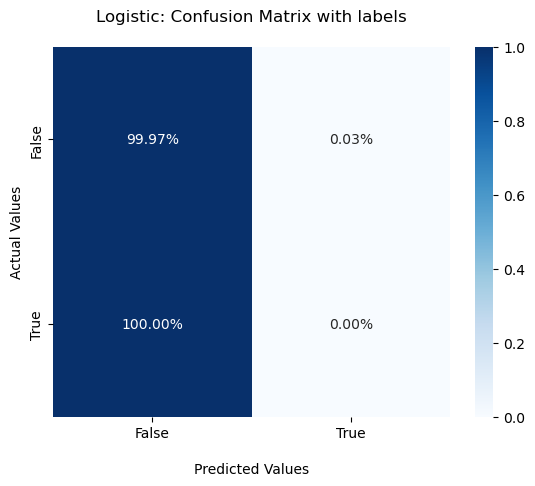

In [21]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_class,
        normalize = 'true'
    ),
    annot=True,
    fmt='.2%',
    cmap='Blues'
)

ax.set_title('Logistic: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [22]:
# (iv) Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.
print('Validation error for logistic model part b is', round((1 - accuracy_score(y_test, y_pred_class)) * 100, 2), '%')

Validation error for logistic model part b is 3.17 %


#### c. Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [23]:
# Random State 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Shape of training ', X_train.shape)
print('Shape of testing ', X_test.shape)

# Double check that the index of the train and test sets match
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

Shape of training  (7000, 2)
Shape of testing  (3000, 2)


,income,balance
3194,11337.059246,1149.209836
1507,51560.028101,396.820316
3438,28262.868133,478.363326
9707,29254.871016,452.367912
9689,31039.002004,649.269775


,income,balance
7878,41328.427624,676.572023
3224,49708.955252,702.276627
1919,29842.886050,595.065973
4432,46147.955753,825.287866
4835,23674.376304,1969.407748


3194    0
1507    0
3438    0
9707    0
9689    0
Name: default, dtype: int64

7878    0
3224    0
1919    0
4432    0
4835    0
Name: default, dtype: int64

In [24]:
# fit the logisitc regression on training data
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [25]:
# obtain the predictions
y_pred_log = logisticRegr.predict_proba(X_test)

y_pred_class = (y_pred_log[:, 1] > 0.5).astype(int)

In [26]:
accuracies['Logit part c_1'] = accuracy_score(y_test, y_pred_class)

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')

Logit part a accuracy: 97.37%
Logit part b accuracy: 96.83%
Logit part c_1 accuracy: 97.63%


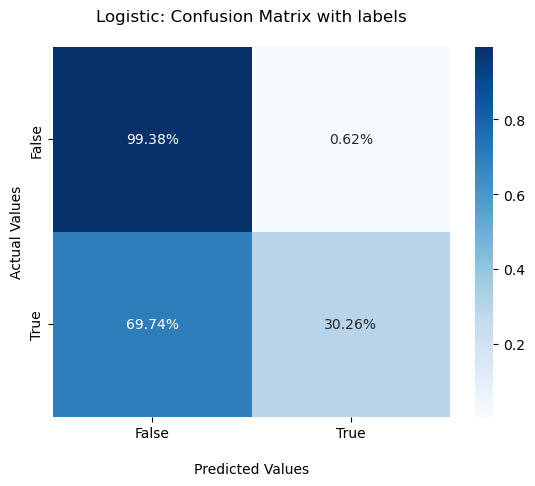

In [27]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_class,
        normalize = 'true'
    ),
    annot=True,
    fmt='.2%',
    cmap='Blues'
)

ax.set_title('Logistic: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [28]:
# computing the validation error
print('Validation error for logistic model part c_1 is', round((1 - accuracy_score(y_test, y_pred_class)) * 100, 2), '%')

Validation error for logistic model part c_1 is 2.37 %


In [29]:
# Random State 6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
print('Shape of training ', X_train.shape)
print('Shape of testing ', X_test.shape)

# Double check that the index of the train and test sets match
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

Shape of training  (7000, 2)
Shape of testing  (3000, 2)


,income,balance
3696,42199.967626,107.706672
3739,16745.066849,901.175244
2172,35133.070407,473.961439
70,31577.615126,597.757142
3980,17534.467078,886.348540


,income,balance
739,30290.806505,961.315769
9426,47099.206874,1375.384954
8200,47924.697911,87.948652
5880,20054.898497,1085.152966
9114,37410.376383,1060.972920


3696    0
3739    0
2172    0
70      0
3980    0
Name: default, dtype: int64

739     0
9426    0
8200    0
5880    0
9114    0
Name: default, dtype: int64

In [30]:
# fit the logisitc regression on training data
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [31]:
# obtain the predictions
y_pred_log = logisticRegr.predict_proba(X_test)

y_pred_class = (y_pred_log[:, 1] > 0.5).astype(int)

In [32]:
accuracies['Logit part c_2'] = accuracy_score(y_test, y_pred_class)

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')

Logit part a accuracy: 97.37%
Logit part b accuracy: 96.83%
Logit part c_1 accuracy: 97.63%
Logit part c_2 accuracy: 97.53%


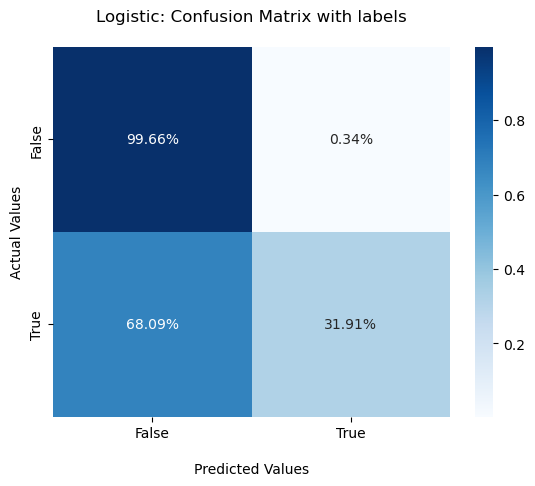

In [33]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_class,
        normalize = 'true'
    ),
    annot=True,
    fmt='.2%',
    cmap='Blues'
)

ax.set_title('Logistic: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [34]:
# computing the validation error
print('Validation error for logistic model part c_2 is', round((1 - accuracy_score(y_test, y_pred_class)) * 100, 2), '%')

Validation error for logistic model part c_2 is 2.47 %


In [35]:
# Random State 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
print('Shape of training ', X_train.shape)
print('Shape of testing ', X_test.shape)

# Double check that the index of the train and test sets match
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

Shape of training  (7000, 2)
Shape of testing  (3000, 2)


,income,balance
3393,29217.352343,619.903822
7258,56291.602012,1067.379034
7768,25272.486067,838.653017
1543,56141.113756,990.674804
1992,14213.705583,485.868910


,income,balance
3644,19335.634036,894.725491
9184,15082.677111,952.887131
520,21218.303520,1028.953640
5685,43646.911717,0.000000
2401,19649.484429,1610.015858


3393    0
7258    0
7768    0
1543    0
1992    0
Name: default, dtype: int64

3644    0
9184    0
520     0
5685    0
2401    0
Name: default, dtype: int64

In [36]:
# fit the logisitc regression on training data
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [37]:
# obtain the predictions
y_pred_log = logisticRegr.predict_proba(X_test)

y_pred_class = (y_pred_log[:, 1] > 0.5).astype(int)

In [38]:
accuracies['Logit part c_3'] = accuracy_score(y_test, y_pred_class)

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')

Logit part a accuracy: 97.37%
Logit part b accuracy: 96.83%
Logit part c_1 accuracy: 97.63%
Logit part c_2 accuracy: 97.53%
Logit part c_3 accuracy: 96.93%


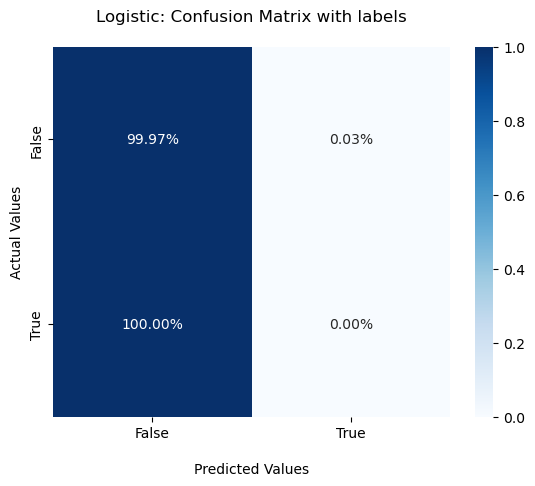

In [39]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_class,
        normalize = 'true'
    ),
    annot=True,
    fmt='.2%',
    cmap='Blues'
)

ax.set_title('Logistic: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [40]:
# computing the validation error
print('Validation error for logistic model part c_3 is', round((1 - accuracy_score(y_test, y_pred_class)) * 100, 2), '%')

Validation error for logistic model part c_3 is 3.07 %


**Conclusion**: By employing three distinct splits (validation approach) of the observations with random states 2, 6, and 9, we obtained validation errors for logistic models of 2.37%, 2.47%, and 3.07%, respectively. These validation errors demonstrate consistency and fall within the same order of magnitude. The validation estimate of the test error rate be highly variable, depending on precisely which observations are included in the training set and which observations are included in the validation set. Our results indicate that the model performs reliably across different random splits of the data. The slight variations in error rates suggest that the model's predictive performance is stable and not highly influenced by the specific composition of training and testing sets. This consistency is indicative of the robustness of the model, demonstrating its ability to generalize well to new, unseen data. Furthermore, the low validation errors across different splits imply that the logistic model is effective in making accurate predictions. The model appears to generalize reliably, as evidenced by its ability to maintain low error rates across various random splits. This consistency is a positive indication that the model is not overfitting to the training data and can reliably predict whether default occurs in the dataset. Overall, these results suggest that the logistic model is well-suited for the classification task, and its reliable performance across different data splits instills confidence in its ability to generalize and make accurate predictions on new observations.  

**Note:** The mean of Validation error is 2.63 and the SD is 0.3785. In the validation approach, only a subset of the observations - those that are included in the training set rather than in the validation set - are used to fit the model. Since statistical methods tend to perform worse when trained on fewer observations, this suggests that the validation set error rate may tend to _overestimate_ the test error rate for the model fit on the entire data set. When comparing the validation errors obtained from part c, which involves cross-validation by splitting the data, with those from part a, where the entire dataset is used for training, we observe that only one validation error from part c (specifically, with a random state of 9) is higher than that from part a. This suggests that, in general, the cross-validation approach tends to provide a slightly higher estimate of the test error compared to using the entire dataset in part a. This discrepancy arises because the cross-validation method utilizes only a subset of observations for training and validation in each split, potentially leading to a more conservative estimate of the model's performance on unseen data. It implies that with more cross-validation iterations and different data splits, we might observe a consistent trend of the cross-validation approach tending to overestimate the test error, given its reliance on a smaller subset of observations compared to the entirety of the dataset used in part a.

#### d. Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [41]:
# Create indicator 1 if Student 'Yes' and 0 if Student 'No'
df['student'] = df['student'].map(encoding_dict)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['default'],axis = 1), df['default'], test_size = 0.3,
                                                  random_state = 42)
print('Shape of training ', X_train.shape)
print('Shape of testing ', X_test.shape)

# Double check that the index of the train and test sets match
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

Shape of training  (7000, 3)
Shape of testing  (3000, 3)


,student,balance,income
9069,0,0.000000,41239.020510
2603,0,961.999353,37073.192381
7738,1,655.611221,19039.168273
1579,0,864.047198,27690.113535
5058,0,1306.832034,57561.411261


,student,balance,income
6252,0,1435.662933,31507.089277
4684,0,771.789347,42139.070269
1731,0,0.000000,21809.218509
4742,0,113.571264,32803.832648
4521,0,1358.132472,49903.597081


9069    0
2603    0
7738    0
1579    0
5058    0
Name: default, dtype: int64

6252    0
4684    0
1731    0
4742    0
4521    0
Name: default, dtype: int64

We want to make sure that our train and test sets are balanced. This means making sure that there are no significant differences between them. For this, we will merge the datasets back together while adding a dummy variable indicating whether a row comes from the training or the test set. We can then use this dummy variable as the dependent variable in a regression and evaluate the p-values of all features.

Note that we only need to do this on the features. For the targets, we simply want to make sure that the labels are relatively well distributed among the train and test set.

In [46]:
# Insert the dummy variable in each set. 
X_train.insert(0, 'test', 0)
X_test.insert(0, 'test', 1)

# Merge the train and test set
X_full = pd.concat([X_test, X_train], axis = 0)

display(X_full)
print(X_full['test'].value_counts())

,test,student,balance,income
6252,1,0,1435.662933,31507.089277
4684,1,0,771.789347,42139.070269
1731,1,0,0.000000,21809.218509
4742,1,0,113.571264,32803.832648
4521,1,0,1358.132472,49903.597081
...,...,...,...,...
5734,0,0,865.697004,33541.046380
5191,0,1,493.629546,20500.212632
5390,0,0,722.029162,26984.256287
860,0,1,163.939823,21083.004510


0    7000
1    3000
Name: test, dtype: int64


In [47]:
result = smf.ols(
    'test ~ income + balance + student',
    data = X_full
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   test   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.313
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.268
Time:                        18:52:04   Log-Likelihood:                -6384.2
No. Observations:               10000   AIC:                         1.278e+04
Df Residuals:                    9996   BIC:                         1.281e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3408      0.023     14.902      0.0

All of the p-values are larger than 0.05, hence, we can conclude that the train and test set are not significantly different (i.e., that they are very similar). This is exactly what we wished for. Otherwise, a model trained on the training set would not be able to predict the test set well.

With the labels, it is often sufficient to compute the percentage of positive labels (i.e., percentage of mpg01) and see if this ratio is approximately equal. In this case, it is true.

In [48]:
# Check the label distribution in the training and test sets
print(f'Percentage of positive labels in the test set: {round(y_test.mean()*100, 2)}')
print(f'Percentage of positive labels in the training set: {round(y_train.mean()*100, 2)}')

Percentage of positive labels in the test set: 3.13
Percentage of positive labels in the training set: 3.41


In [49]:
# Remove the test dummy
X_test = X_test.drop(['test'], axis=1)
X_train = X_train.drop(['test'], axis=1)

In [50]:
# fit the logisitc regression on training data
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [51]:
# obtain the predictions
y_pred_log = logisticRegr.predict_proba(X_test)

y_pred_class = (y_pred_log[:, 1] > 0.5).astype(int)

accuracies['Logit part d'] = accuracy_score(y_test, y_pred_class)

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')

Logit part a accuracy: 97.37%
Logit part b accuracy: 96.83%
Logit part c_1 accuracy: 97.63%
Logit part c_2 accuracy: 97.53%
Logit part c_3 accuracy: 96.93%
Logit part d accuracy: 96.83%


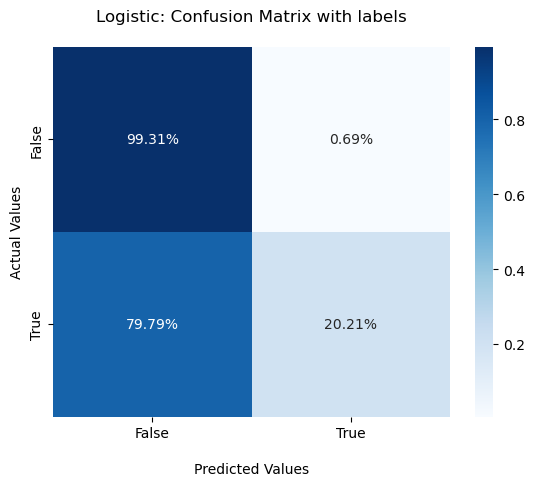

In [52]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_class,
        normalize = 'true'
    ),
    annot=True,
    fmt='.2%',
    cmap='Blues'
)

ax.set_title('Logistic: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [54]:
# computing the validation error
print('Validation error for logistic model part d is', round((1 - accuracy_score(y_test, y_pred_class)) * 100, 2), '%')

Validation error for logistic model part d is 3.17 %


**Conclusion:** As we can see from the results above, using balance and income for predicting default (part b), validation error was around 3.17%. When we added a new dummy variable student, the error remains the same which is 3.17% (random_state = 42). So compared to the values above without the student dummy variable, it seems that adding the student variable does not help in any of the metrics since they are very similar (although we should consider the variance, in a more careful analysis).